In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('train.csv')

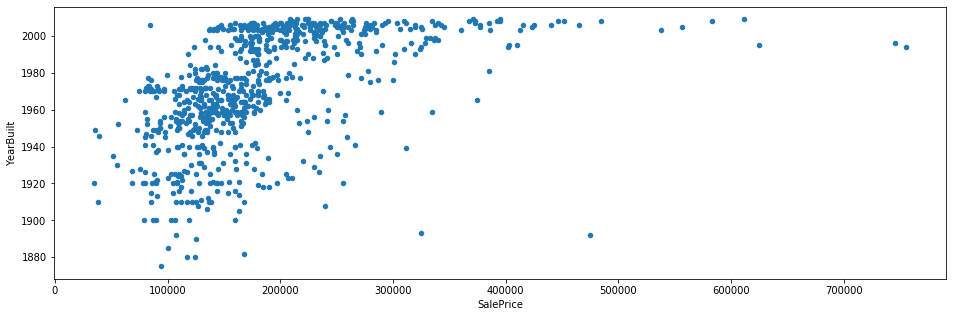

In [1021]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

#-  df.plot.scatter('SalePrice','OverallQual',ax = ax1)
df.plot.scatter('SalePrice','YearBuilt',ax = ax1)   #??
#- df.plot.scatter('SalePrice','TotalBsmtSF',ax = ax1)
#- df.plot.scatter('SalePrice','1stFlrSF',ax = ax1)
#df.plot.scatter('SalePrice','2ndFlrSF',ax = ax1) #много 0, возможно стоит их не
                                                 #учитывать или считать средним
#-  df.plot.scatter('SalePrice','GrLivArea',ax = ax1)
#x df.plot.scatter('SalePrice','TotRmsAbvGrd',ax = ax1) #??
#-  df.plot.scatter('SalePrice','GarageArea',ax = ax1) #в последнюю очередь
#df.plot.scatter('OpenPorchSF','SalePrice',ax = ax1) #

In [ ]:
#mean = df['2ndFlrSF'].mean()
df.loc[df['2ndFlrSF'] == 342.648338, '2ndFlrSF'] = 0
df[['2ndFlrSF','res2']]
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)
df.plot.scatter('SalePrice','2ndFlrSF',ax = ax1)

In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 96 columns):
Id                               782 non-null int64
MSSubClass                       782 non-null int64
MSZoning                         782 non-null object
LotFrontage                      638 non-null float64
LotArea                          782 non-null int64
Street                           782 non-null object
Alley                            39 non-null object
LotShape                         782 non-null object
LandContour                      782 non-null object
Utilities                        782 non-null object
LotConfig                        782 non-null object
LandSlope                        782 non-null object
Neighborhood                     782 non-null object
Condition1                       782 non-null object
Condition2                       782 non-null object
BldgType                         782 non-null object
HouseStyle                       782 non-null obje

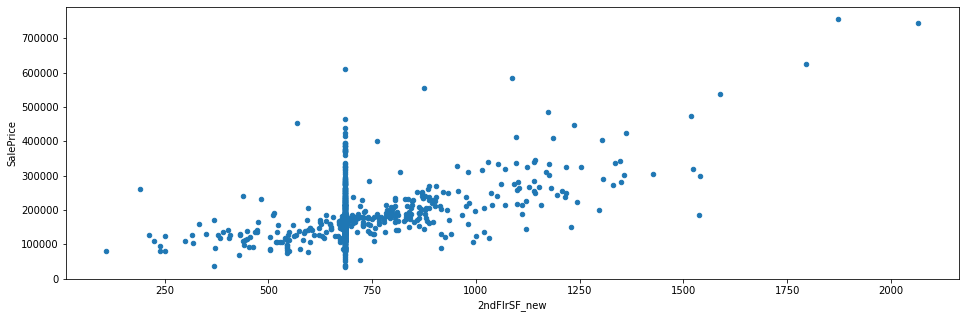

In [638]:
#df['LotArea_new'] = df['LotArea'].copy()
df['2ndFlrSF_new'] = df['2ndFlrSF'].copy()
#mean = df['LotArea'].mean()
df.loc[df['2ndFlrSF_new'] == 0, '2ndFlrSF_new'] = 2*df['2ndFlrSF'].mean()
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)
df.plot.scatter('2ndFlrSF_new','SalePrice',ax = ax1)


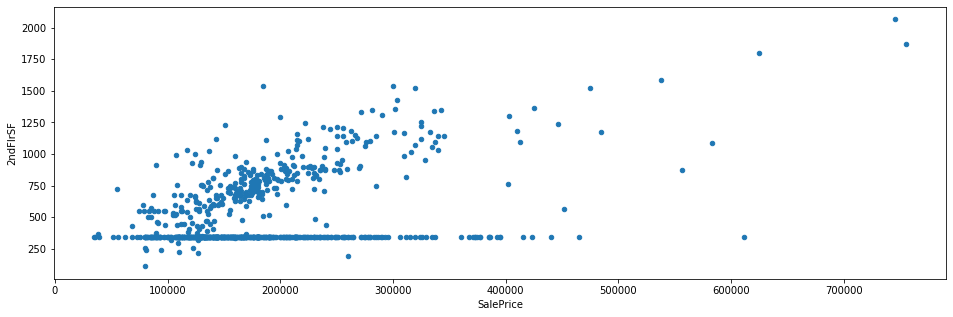

In [450]:
#mean = df['2ndFlrSF'].mean()
df.loc[df['2ndFlrSF'] == 30000, '2ndFlrSF'] = 1
df[['2ndFlrSF','res2']]
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)
df.plot.scatter('SalePrice','2ndFlrSF',ax = ax1)

In [639]:
from numpy.linalg import inv

X  = df['2ndFlrSF_new'].values
y  = df['SalePrice'].values

X = X.reshape((len(X), 1))
ones_ = np.ones(X.shape).reshape((len(X), 1))

X = np.hstack((X,ones_))

w = inv(X.T.dot(X)).dot(X.T).dot(y)

ymean = np.mean(y)

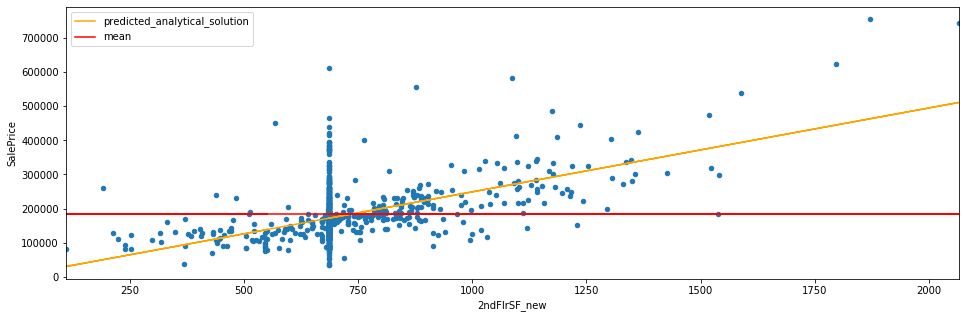

In [640]:
df['predicted_analytical_solution'] = w[1] + w[0]*df['2ndFlrSF_new']
df['mean'] = ymean

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

df.plot.scatter('2ndFlrSF_new','SalePrice',ax = ax1)
df.plot.line('2ndFlrSF_new','predicted_analytical_solution',ax = ax1,color = 'orange')
df.plot.line('2ndFlrSF_new','mean',ax = ax1,color = 'red')

In [641]:
TSS = ((y - ymean) ** 2).sum()
ESS = ((df['predicted_analytical_solution'] - ymean) ** 2).sum()

detCoef = (ESS/TSS)**0.5 #нужно вщять корень
detCoef

0.5620719580605777

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [459]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

y_train_pred = w[1] + w[0]*X_train[:,0] #[:,0]
y_test_pred = w[1] + w[0]*X_test[:,0]

In [460]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 4692459302.754, test: 3726502053.912
R^2 train: 0.369, test: 0.413


In [461]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X,y)

print(linearmodel.coef_[0])
print(linearmodel.intercept_)

137.5014998950675
22872.003464527428


In [465]:
import statsmodels

import statsmodels.formula.api as smf
model = smf.ols('SalePrice~OverallQual',data=df)
fitted = model.fit()

In [464]:
fitted.params

Intercept     -102022.209008
OverallQual     46615.814799
dtype: float64

In [802]:
X  = df['res2'].values
y  = df['SalePrice'].values

In [803]:
X_scaled = (X - X.mean())/X.std()

# Задаем начальные приближения для w0 и w1
w0 = 120
w1 = -1

L = 0.001 #шаг обновления весов    менять шаг, итерации, веса
epochs = 10 # кол-во итераций

n = float(len(X_scaled))

for i in range(epochs): 

    w1 = w1 + L * sum(X_scaled*(y - w0 - w1*X_scaled)) -L*10*w1
    w0 = w0 + L * sum((y - w0 - w1*X_scaled)) -L*10*w0

    plt.show()

#     break

print (w1, w0)
w1_res2 = w1
w0_res2 = w0

''' найденные коэфы
OverallQual
GrLivArea
GarageArea
TotalBsmtSF
1stFlrSF
res2
'''

71370.54333509642 181020.85389271576


' найденные коэфы\nOverallQual\nGrLivArea\nGarageArea\nTotalBsmtSF\n1stFlrSF\nres2\n'

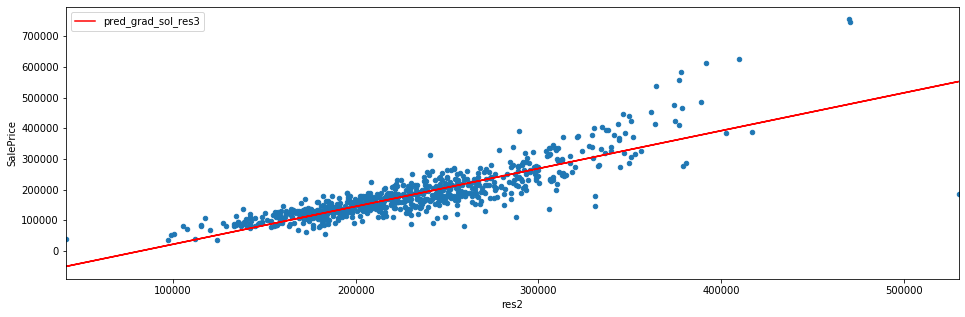

In [804]:
df['pred_grad_sol_res3'] = w0_res2 + w1_res2*X_scaled
#df['mean'] = ymean

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

df.plot.scatter('res2','SalePrice',ax = ax1)
#df.plot.line('OverallQual','predicted_analytical_solution',ax = ax1,color = 'green')
df.plot.line('res2','pred_grad_sol_res3',ax = ax1,color = 'red')

#df.plot.line('SalePrice','mean',ax = ax1,color = 'red')

In [787]:
df['res2']= (df['pred_grad_sol_OverallQual']+df['pred_grad_sol_GrLivArea']+
            df['pred_grad_sol_GarageArea']+df['pred_grad_sol_TotalBsmtSF']+
           df['pred_grad_sol_1stFlrSF'])*0.25


In [723]:
df[['SalePrice', 'res2', 'pred_grad_sol_res2']]

,SalePrice,res2,pred_grad_sol_res2
0,120000,144387.676440,121907.739616
1,232600,222881.514086,245706.503387
2,175500,188644.210333,191708.176811
3,199900,208525.846912,223065.059135
4,200000,243265.692654,277855.983942
5,159000,184412.866073,185034.593200
6,179600,201989.348403,212755.836665
7,113000,143852.564479,121063.772736
8,165500,184286.287935,184834.956929
9,107000,125556.082437,92206.961475


In [ ]:
# ЧТЕНИЕ ТЕСТА
dtest = pd.read_csv('test.csv')

In [391]:
res = pd.read_csv('sample.csv')

In [685]:
# подготовка столбца 2ndFlrSF
dtest['2ndFlrSF_new'] = dtest['2ndFlrSF'].copy()
dtest.loc[dtest['2ndFlrSF_new'] == 0, '2ndFlrSF_new'] = 2*dtest['2ndFlrSF'].mean()

In [930]:
### для теста!!!

X = dtest['TotalBsmtSF'].values
X_scaled = (X - X.mean())/X.std()

dtest['pred_res_TotalBsmtSF'] = W0_TotalBsmtSF+ W1_TotalBsmtSF * X_scaled

In [931]:
# получения результата для теста
dtest['res']=(dtest['pred_res_OverallQual']+dtest['pred_res_GrLivArea']+
            dtest['pred_res_GarageArea']+dtest['pred_res_TotalBsmtSF'])/4

In [932]:
res['SalePrice'] = dtest['res']
res.to_csv('res8.csv', index=False)

In [810]:
#  ТЕСТ   реализация L2-регуляризации
X  = df['SalePrice'].values
y  = df['res2'].values

X_scaled = (X - X.mean())/X.std()

# Задаем начальные приближения для w0 и w1
k0 = 120
k1 = -1

n1 = 0.001 #шаг обновления весов    менять шаг, итерации, веса
n2 = .005

epochs = 10 # кол-во итераций

n = float(len(X_scaled))

for i in range(epochs): 
    
    k1 = k1 + n1 * (sum(X_scaled*(y - k0 - k1*X_scaled)) + n2*k1)
    k0 = k0 + n1 * (sum((y - k0 - k1*X_scaled)) + n2*k0)
    
    plt.show()
    
#     break

print (k1, k0)

df['pred_res2'] = k0 + k1*X_scaled

#fig = plt.figure(figsize=(16,5))
#ax1 = plt.subplot(111)

#df.plot.scatter('res2','SalePrice',ax = ax1)
#df.plot.line('pred_res1','predicted_analytical_solution',ax = ax1,color = 'green')
#df.plot.line('res2','pred_res1',ax = ax1,color = 'red')


49535.2080981739 229171.01215920108


In [762]:
dtest['pred_res1'] = 0

39110.40913817824 171490.4541362698


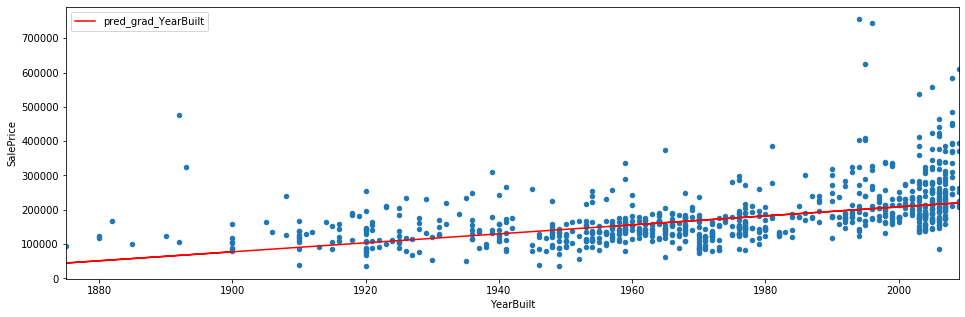

In [1026]:
# реализация L2-регуляризации
X  = df['YearBuilt'].values
y  = df['SalePrice'].values

X_scaled = (X - X.mean())/X.std()

# Задаем начальные приближения для w0 и w1
W0 = 120
W1 = -10

n1 = 0.01 #шаг обновления весов    менять шаг, итерации, веса
n2 = .1

epochs = 150 # кол-во итераций

n = float(len(X_scaled))

for i in range(epochs): 
    
    W1 = W1 + n1 * (sum(X_scaled*(y - W0 - W1*X_scaled)) + n2*np.sign(W1))
    W0 = W0 + n1 * (sum((y - W0 - W1*X_scaled)) + n2*np.sign(W0))
    n1 *= .75
    
    plt.show()
    
#     break

print (W1, W0)

df['pred_grad_YearBuilt'] = W0 + W1*X_scaled

W0_YearBuilt = W0 
W1_YearBuilt = W1

fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)

df.plot.scatter('YearBuilt','SalePrice',ax = ax1)
#df.plot.line('pred_res1','predicted_analytical_solution',ax = ax1,color = 'green')
df.plot.line('YearBuilt','pred_grad_YearBuilt',ax = ax1,color = 'red')


In [947]:
df[['pred_grad_TotalBsmtSF','pred_grad_TotalBsmtSF1','pred_grad_sol_TotalBsmtSF','SalePrice']]

,pred_grad_TotalBsmtSF,pred_grad_TotalBsmtSF1,pred_grad_sol_TotalBsmtSF,SalePrice
0,46797.398893,46806.331059,50022.085523,120000
1,224357.101094,224399.999909,239857.216592,232600
2,194902.939614,194940.203934,208366.768389,175500
3,157697.683007,157727.830072,168589.360133,199900
4,195618.425318,195655.826508,209131.718548,200000
5,213028.577447,213069.309149,227745.505745,159000
6,216367.510733,216408.881162,231315.273153,179600
7,165210.282899,165241.867102,176621.336800,113000
8,213505.567917,213546.390865,228255.472518,165500
9,128601.264380,128625.845385,137481.387009,107000


In [1042]:
#df['res_1'] = .4*df['pred_grad_OverallQual']+.4*df['pred_grad_GrLivArea']+.3*df['pred_grad_GarageArea']
df['res_2'] = (df['pred_grad_OverallQual']+
               df['pred_grad_GrLivArea']+
               df['pred_grad_GarageArea']+
               df['pred_grad_TotalBsmtSF']+
               df['pred_grad_1stFlrSF']+
              df['pred_grad_YearBuilt'])*.5 #лучше
df[['res_0','res_1','SalePrice','res_2','res2']]

,res_0,res_1,SalePrice,res_2,res2
0,133672.589356,111953.791740,120000,404343.938393,168933.189750
1,227601.419159,226790.339642,232600,676393.849992,294127.088501
2,183065.657259,186024.977848,175500,556163.807335,242953.974777
3,199697.617723,189197.634044,199900,559049.894020,236514.578957
4,238950.330203,228117.353982,200000,644382.562472,293058.828492
5,172035.104389,182283.472654,159000,552669.340057,245080.089342
6,197584.091668,202279.946434,179600,621423.094929,266520.276896
7,124870.660792,134955.566319,113000,407222.315850,183487.579694
8,162630.570733,175349.320029,165500,557383.417825,249086.632376
9,114249.053171,117837.105973,107000,358459.744890,157905.533851


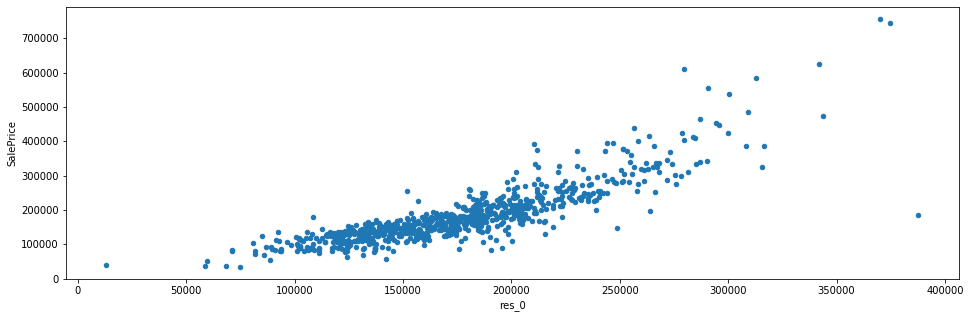

In [925]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(111)
df.plot.scatter('res_0','SalePrice',ax = ax1)

In [926]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,pred_grad_sol_res3,pred_res2,pred_an_sol4,pred_grad_OverallQual,pred_grad_GrLivArea,pred_an_res1,res_1,pred_grad_GarageArea,res_0,pred_grad_TotalBsmtSF
0,0,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,106648.785321,191977.402543,120000.0,132060.768220,151841.378797,120877.610381,111953.791740,117115.621051,133672.589356,46797.398893
1,1,20,FV,81.0,11216,Pave,NaN,Reg,Lvl,AllPub,...,261221.888392,258101.226877,232600.0,272980.662155,168696.917416,259783.229183,226790.339642,241126.677905,227601.419159,224357.101094
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,198039.999649,224569.518445,175500.0,226007.364176,140755.185612,193922.006612,186024.977848,182434.421990,183065.657259,194902.939614
3,3,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,190089.473276,238898.304535,199900.0,226007.364176,213607.312260,218517.998758,189197.634044,159478.176732,199697.617723,157697.683007
4,4,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,259902.940214,238957.029068,200000.0,132060.768220,298224.378615,276566.441693,228117.353982,286565.843775,238950.330203,195618.425318
5,5,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,200665.048706,214879.970474,159000.0,179034.066198,157950.097491,177609.594594,182283.472654,179121.149478,172035.104389,213028.577447
6,6,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,227136.596869,226977.224304,179600.0,226007.364176,161117.581259,215392.433954,202279.946434,205627.329569,197584.091668,216367.510733
7,7,45,RM,58.0,6380,Pave,NaN,Reg,Lvl,AllPub,...,124618.648385,187866.685222,113000.0,132060.768220,118809.048081,107860.974951,134955.566319,123742.166074,124870.660792,165210.282899
8,8,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,...,205611.805660,218697.065129,165500.0,132060.768220,192566.170091,163701.803239,175349.320029,163264.773888,162630.570733,213505.567917
9,9,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,...,93033.273632,184343.213233,107000.0,85087.470242,150483.885754,92153.327125,117837.105973,107175.803517,114249.053171,128601.264380


In [ ]:
# w0 + w1*(1.5*(X1+X2)+.5*X3)*.25 -> 0.8597386877430457
# w0 + w1*(1.3*(X1+X2)+.7*X3)*.25 -> 0.8613783141863854
# w0 + w1*(1.5*(X1+X2)+.5*(X3+X4))*.25-> 0.872972272248603
# w0 + w1*(1.5*(X1+X2)+.5*(X3+X4+X5))*.25 ->0.8744923960071886
 

In [869]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,pred_grad_sol_res2,pred_res1,pred_an_sol3,pred_grad_sol_res3,pred_res2,pred_an_sol4,pred_grad_OverallQual,pred_grad_GrLivArea,pred_an_res1,res_1
0,0,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,121907.739616,152379.277027,108012.596884,106648.785321,191977.402543,120000.0,132060.768220,151841.378797,131056.864988,141951.073509
1,1,20,FV,81.0,11216,Pave,NaN,Reg,Lvl,AllPub,...,245706.503387,207416.431947,264562.361830,261221.888392,258101.226877,232600.0,272980.662155,168696.917416,270904.309386,220838.789785
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,191708.176811,179506.826744,200572.510846,198039.999649,224569.518445,175500.0,226007.364176,140755.185612,224288.494587,183381.274894
3,3,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,223065.059135,191433.172925,192520.314118,190089.473276,238898.304535,199900.0,226007.364176,213607.312260,224288.494587,219807.338218
4,4,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,277855.983942,191482.051393,263226.547105,259902.940214,238957.029068,200000.0,132060.768220,298224.378615,131056.864988,215142.573417
5,5,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,185034.593200,171441.879531,203231.128709,200665.048706,214879.970474,159000.0,179034.066198,157950.097491,177672.679788,168492.081845
6,6,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,212755.836665,181510.843930,230041.191782,227136.596869,226977.224304,179600.0,226007.364176,161117.581259,224288.494587,193562.472718
7,7,45,RM,58.0,6380,Pave,NaN,Reg,Lvl,AllPub,...,121063.772736,148957.784270,126212.256352,124618.648385,187866.685222,113000.0,132060.768220,118809.048081,131056.864988,125434.908151
8,8,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,...,184834.956929,174618.979948,208241.144184,205611.805660,218697.065129,165500.0,132060.768220,192566.170091,131056.864988,162313.469156
9,9,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,...,92206.961475,146025.076193,94222.971702,93033.273632,184343.213233,107000.0,85087.470242,150483.885754,84441.050189,117785.677998


In [269]:
X_fit.shape

(432225, 1)

552.7173913043479

In [265]:
df['res_prob'] = X_quad[:,1]

In [782]:
df[['SalePrice','res2','pred_grad_sol_OverallQual','pred_grad_sol_GrLivArea',
   'pred_grad_sol_GarageArea','pred_grad_sol_TotalBsmtSF',
   'pred_grad_sol_1stFlrSF']]

,SalePrice,res2,pred_grad_sol_OverallQual,pred_grad_sol_GrLivArea,pred_grad_sol_GarageArea,pred_grad_sol_TotalBsmtSF,pred_grad_sol_1stFlrSF
0,120000,138556.313021,131056.833247,162328.220105,125201.656983,50022.085523,207123.963142
1,232600,231391.954555,270904.243743,180349.021529,257786.190481,239857.216592,227611.681660
2,175500,191445.382572,224288.440245,150475.612456,195036.258597,208366.768389,193648.819419
3,199900,205497.579522,224288.440245,228364.177003,170492.938464,168589.360133,154323.399983
4,200000,231007.707455,131056.833247,318831.019054,306366.782907,209131.718548,206848.960209
5,159000,186119.158004,177672.636746,168859.248809,191493.923732,227745.505745,214549.042337
6,179600,206833.922402,224288.440245,172245.708137,219832.602648,231315.273153,218399.083400
7,113000,138929.082831,131056.833247,127012.287112,132286.326712,176621.336800,166973.534906
8,165500,185183.395108,131056.833247,205868.411466,174541.321167,228255.472518,256624.491104
9,107000,124626.453661,84441.029749,160876.880393,114574.652390,137481.387009,134248.185865


In [727]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=10)

y_train_pred = w0_res2 + w1_res2*X_train
y_test_pred = w0_res2 + w1_res2*X_test


print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1749116571.837, test: 1353161831.145
R^2 train: 0.765, test: 0.787


In [271]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=10)

y_train_pred = w0 + w1*X_train
y_test_pred = w0 + w1*X_test


print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 4325671487.097, test: 3633816310.648
R^2 train: 0.418, test: 0.428


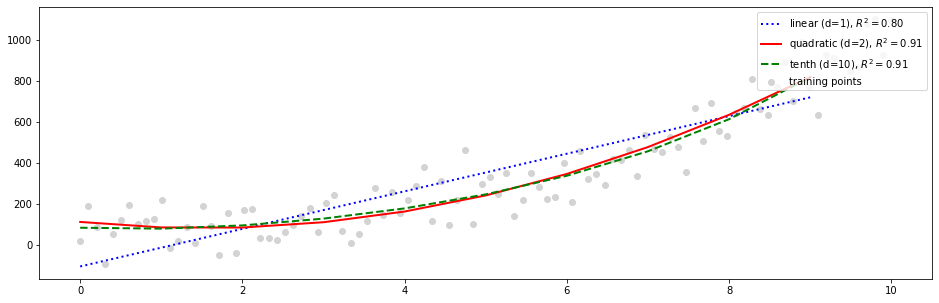

In [272]:
from sklearn.preprocessing import PolynomialFeatures


n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100

X = X.reshape(-1,1)

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
tenth = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_tenth = tenth.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_tenth, y)
y_tenth_fit = regr.predict(tenth.fit_transform(X_fit))
tenth_r2 = r2_score(y, regr.predict(X_tenth))

fig = plt.figure(figsize=(16,5))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_tenth_fit, 
         label='tenth (d=10), $R^2={:.2f}$'.format(tenth_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.legend(loc='upper right')
plt.show()

In [273]:
regr.coef_

array([  0.        , -15.95009449,  12.50129189,  -1.0242614 ,
         0.09336517])

In [235]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,predicted_analytical_solution,mean,predicted_gradient_solution,pred_grad_sol_GrLivArea,pred_grad_sol_OverallQual,res,pred_grad_sol_GarageArea,res1,pred_an_sol,pred_grad_sol_TotalBsmtSF
0,0,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,50022.097619,183335.726343,162328.220105,162328.220105,131056.833247,146692.526676,125201.656983,131922.362820,110392.676300,50022.085523
1,1,20,FV,81.0,11216,Pave,NaN,Reg,Lvl,AllPub,...,239857.274709,183335.726343,180349.021529,180349.021529,270904.243743,225626.632636,257786.190481,231425.400361,251563.391841,239857.216592
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,208366.818872,183335.726343,150475.612456,150475.612456,224288.440245,187382.026350,195036.258597,190961.898136,194155.480449,208366.768389
3,3,60,RL,NaN,11214,Pave,NaN,IR1,Lvl,AllPub,...,168589.400973,183335.726343,228364.177003,228364.177003,224288.440245,226326.308624,170492.938464,212130.018793,224187.917785,168589.360133
4,4,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,209131.769217,183335.726343,318831.019054,318831.019054,131056.833247,224943.926151,306366.782907,233145.257295,254003.452365,209131.718548
5,5,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,227745.560926,183335.726343,168859.248809,168859.248809,177672.636746,173265.942777,191493.923732,182354.385768,181943.504713,227745.505745
6,6,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,231315.329199,183335.726343,172245.708137,172245.708137,224288.440245,198267.074191,219832.602648,205093.790118,214205.213124,231315.273153
7,7,45,RM,58.0,6380,Pave,NaN,Reg,Lvl,AllPub,...,176621.379587,183335.726343,127012.287112,127012.287112,131056.833247,129034.560179,132286.326712,135389.378074,115311.531404,176621.336800
8,8,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,...,228255.527822,183335.726343,205868.411466,205868.411466,131056.833247,168462.622357,174541.321167,176696.565978,173916.428476,228255.472518
9,9,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,...,137481.420308,183335.726343,160876.880393,160876.880393,84441.029749,122658.955071,114574.652390,123501.221228,98445.115565,137481.387009


In [957]:
from numpy.linalg import inv

X  = df['pred_grad_1stFlrSF'].values
#X = y_quad_fit.values
y  = df['SalePrice'].values

X = X.reshape((len(X), 1))
ones_ = np.ones(X.shape).reshape((len(X), 1))

X = np.hstack((X,ones_))


w = inv(X.T.dot(X)).dot(X.T).dot(y)

ymean = np.mean(y)

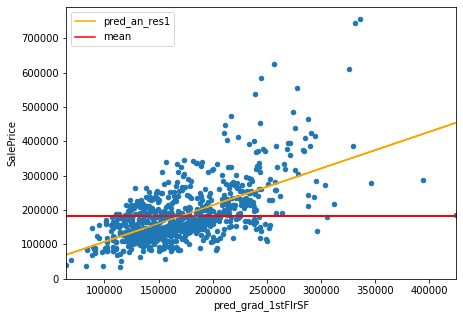

In [958]:
df['pred_an_res1'] = w[1] + w[0]*df['pred_grad_1stFlrSF']
df['mean'] = ymean

fig = plt.figure(figsize=(7,5))
ax1 = plt.subplot(111)

df.plot.scatter('pred_grad_1stFlrSF','SalePrice',ax = ax1)
df.plot.line('pred_grad_1stFlrSF','pred_an_res1',ax = ax1,color = 'orange')
df.plot.line('pred_grad_1stFlrSF','mean',ax = ax1,color = 'red')

In [959]:
TSS = ((y - ymean) ** 2).sum()
ESS = ((df['pred_an_res1'] - ymean) ** 2).sum()

detCoef = (ESS/TSS)**0.5 #
detCoef

0.6174964982469668